In [ ]:
import requests
import numpy as np
import pandas as pd

import calendar

import matplotlib.pyplot as plt
from cycler import cycler
plt.rc('figure', dpi=150)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=10)
berlin = {
    "U1": "#62AD2D",
    "U2": "#E94D10",
    "U3": "#00A192",
    "U4": "#FFD401",
    "U5": "#815237",
    "U6": "#846DAA",
    "U7": "#009AD9",
    "U8": "#005A99",
    "U9": "#F18800",
    "S9": "#9B2B48",
    "S7": "#846DAA",
    "S8": "#62AD2D",
    "S2": "#007B3D",
}
palette =  [berlin["U7"], berlin["U1"], berlin["U9"],berlin["U2"], berlin["U2"], berlin["U8"], berlin["U6"]]
plt.rc('axes', prop_cycle=cycler(color=palette))



Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions from other industry',
       'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from cement',
       'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil',
       'Annual CO₂ emissions from coal'],
      dtype='object')
dict_values(['#6E0E0A', '#D74E09', '#F2BB05', '#F0F0C9', '#124E78'])


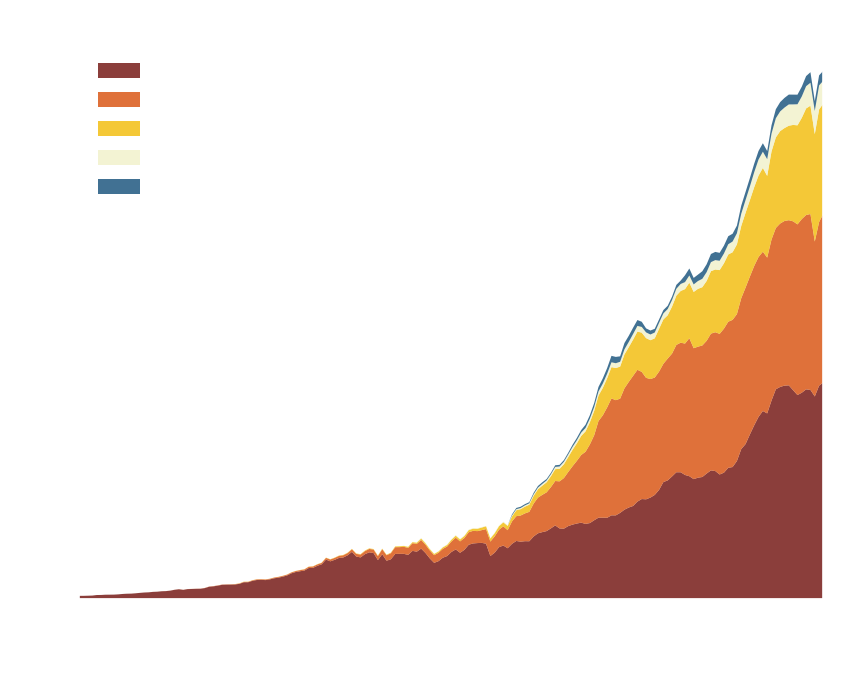

In [60]:
co2_by_source = pd.read_csv('co2-by-source.csv')
print(co2_by_source.columns)

years = []
data = {
    "Coal": [],
    "Oil": [],
    "Gas": [],
    "Cement": [],
    # "flaring": [],
    "Other": [],
}

colors  = {
    "Coal": "#6E0E0A",
    "Oil": "#D74E09",
    "Gas": "#F2BB05",
    "Cement": "#F0F0C9",
    # "flaring": "#124E78",
    "Other": "#124E78",
}

for index, row in co2_by_source.iterrows():
    region = row['Entity']
    if region != 'World':
        continue
    year = row['Year']

    data["Other"] += [row['Annual CO₂ emissions from other industry']+row['Annual CO₂ emissions from flaring']]
    # data["flaring"] += [row['Annual CO₂ emissions from flaring']]
    data["Cement"] += [row['Annual CO₂ emissions from cement']]
    data["Gas"] += [row['Annual CO₂ emissions from gas']]
    data["Oil"] += [row['Annual CO₂ emissions from oil']]
    data["Coal"] += [row['Annual CO₂ emissions from coal']]

    years += [year]

for key, value in data.items():
    values = np.array(value)
    values[np.isnan(values)] = 0.0
    values /= 1e9
    data[key] = values

fig, ax = plt.subplots()
print(colors.values())
ax.stackplot(years, data.values(), labels=data.keys(), alpha=0.8, colors=colors.values())
ax.set_xlim(1850, 2022)
ax.set_xlabel("Year")
ax.set_ylabel('$\mathrm{CO_2}$ emissions [billon t]')
ax.legend(loc='upper left', reverse=False, frameon=False)

plt.title(r"$\mathrm{CO_2}$ emissions by source")

txt="Credit: Global Carbon Budget (2023), OurWorldinData.org / Ivan Markin"
plt.figtext(0.5, 0.00, txt, wrap=True, horizontalalignment='center', fontsize=8)

plt.savefig('co2_emissions_by_source.pdf', transparent=True, bbox_inches='tight')
